<a href="https://colab.research.google.com/github/apurvadey/DataScience/blob/master/DataSchoolPandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas Data School Part 2 

Reading CSV file with only two columns and ignoring others

In [3]:
import pandas as pd
ufo = pd.read_csv("http://bit.ly/uforeports")
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [0]:
ufo =  ufo = pd.read_csv("http://bit.ly/uforeports", usecols=['City','State'])

In [0]:
ufo.columns

Index(['City', 'State'], dtype='object')

In [0]:
ufo =  ufo = pd.read_csv("http://bit.ly/uforeports", usecols=[1,4])

In [0]:
ufo.columns

Index(['Colors Reported', 'Time'], dtype='object')

In [0]:
ufo.describe(include=['object']) #describes only those values that are objects

,Colors Reported,Time
count,2882,18241
unique,27,16145
top,RED,11/16/1999 19:00
freq,780,27


Comparable fast way of loading csv file

In [0]:
ufo =  ufo = pd.read_csv("http://bit.ly/uforeports", nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Iteration through individual column items:

In [0]:
for c in ufo.City:
  print(c)

Ithaca
Willingboro
Holyoke


In [0]:
for index, row in ufo.iterrows():
  print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


Best way to drop every non-numeric column from a Dataframe


In [0]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [14]:
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes #this is the way

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [19]:
drinks

,country,beer servings,spirit servings,wine servings,total litres of pure alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [20]:
drinks.columns = drinks.columns.str.replace('_', ' ')
drinks.columns

Index(['country', 'beer servings', 'spirit servings', 'wine servings',
       'total litres of pure alcohol', 'continent'],
      dtype='object')

HOW TO USE AXIS PARAMETER IN PANDAS


In [21]:
drinks.drop('continent', axis=1).head()

,country,beer servings,spirit servings,wine servings,total litres of pure alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [22]:
drinks.drop(2, axis=0).head()

,country,beer servings,spirit servings,wine servings,total litres of pure alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [23]:
drinks.mean(axis=0) #or axis='index'

beer servings                   106.160622
spirit servings                  80.994819
wine servings                    49.450777
total litres of pure alcohol      4.717098
dtype: float64

In [24]:
drinks.mean(axis=1) #or axis='columns'

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [28]:
drinks.mean(axis=0).shape

(4,)

HOW TO USE STRING METHODS IN PANDAS


In [29]:
import pandas as pd
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [30]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [32]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [0]:
orders.choice_description = orders.choice_description.str.replace('[','').str.replace(']','')
#REGEX orders.choice_description.str.replace('[\[\]]','') will do the same

In [36]:
orders.choice_description

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [37]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98


HOW TO CHANGE THE DATA TYPE OF A PANDAS SERIES


In [38]:
drinks.head()

,country,beer servings,spirit servings,wine servings,total litres of pure alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [39]:
drinks.dtypes

country                          object
beer servings                     int64
spirit servings                   int64
wine servings                     int64
total litres of pure alcohol    float64
continent                        object
dtype: object

In [0]:
drinks['beer servings'] = drinks['beer servings'].astype(float)

In [41]:
drinks.dtypes

country                          object
beer servings                   float64
spirit servings                   int64
wine servings                     int64
total litres of pure alcohol    float64
continent                        object
dtype: object

HOW TO DEFINE TYPE OF EACH COLUMN BEFORE ACTUALLY READING THE CSV

In [0]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})

In [45]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [46]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [48]:
orders.item_price.str.replace('$','').astype(float).mean()

7.464335785374397

In [49]:
orders.item_name.str.contains('Chicken').head()
#orders.item_name.str.contains('Chicken').astype(int).head()
#for retrieving the result in binary form

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

WHEN SHOULD A GROUPBY BE USED IN PANDAS

In [50]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [51]:
drinks.beer_servings.mean()

106.16062176165804

In [52]:
drinks.groupby('continent').beer_servings.mean()
#can be replaced by for each

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [53]:
drinks[drinks.continent == 'Europe'].beer_servings.mean()


193.77777777777777

In [54]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0.0
Asia              0.0
Europe            0.0
North America     1.0
Oceania           0.0
South America    93.0
Name: beer_servings, dtype: float64

In [55]:
drinks.groupby('continent').beer_servings.agg(['count', 'min','max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0.0,376.0,61.471698
Asia,44,0.0,247.0,37.045455
Europe,45,0.0,361.0,193.777778
North America,23,1.0,285.0,145.434783
Oceania,16,0.0,306.0,89.687500
South America,12,93.0,333.0,175.083333


In [56]:
drinks.groupby('continent').mean()
#we are not mentioning beer_servings explicitly

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


HOW CAN WE SEE THE VISUALS

In [0]:
%matplotlib inline

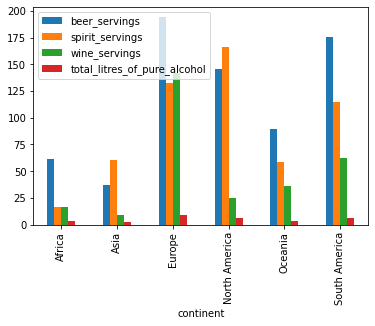

In [58]:
drinks.groupby('continent').mean().plot(kind='bar')


HOW TO EXPLORE A PANDAS SERIES

In [59]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [60]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [65]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [62]:
movies.genre.value_counts()#frquency of each category

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [66]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [67]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

In [69]:
movies.genre.value_counts().head()


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [70]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [71]:
movies.genre.nunique()#no of unique values

16

In [72]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


HOW TO HANDLE MISSING VALUES IN PANDAS

In [73]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [74]:
ufo.isnull().tail()#notnull() for opposite results

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [75]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [76]:
pd.Series([True, False, True]).sum()#creating a pandas series and summing up the values where true=1 and false=0

2

In [77]:
ufo[ufo.City.isnull()] 

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [78]:
ufo.shape

(18241, 5)

In [79]:
ufo.dropna(how='any').shape #drop a row if any of the values are missing

(2486, 5)

In [80]:
ufo.dropna(how='all').shape #drop a row if all the values of that row are missing

(18241, 5)

In [83]:
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape


(18237, 5)

In [84]:
ufo['Shape Reported'].value_counts()


LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
HEXAGON         1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64

In [0]:
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)
#filling the NaN with VARIOUS

In [86]:
ufo['Shape Reported'].value_counts(dropna=False)
#dropna=False meaning all the missing values will be showed
#instead of NaN category VARIOUS would be encountered

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
HEXAGON         1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64